<a href="https://colab.research.google.com/github/meliusa/PCVK_Genap_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Akses folder images pada Google Drive Anda dengan kode berikut:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan
menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan
transformasi linier brightness adalah sebagai berikut:

𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) + 𝑏

dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah
nilai brightness.
Tuliskan potongan kode berikut untuk mengimplementasikan linier brightness pada google
colab: 

Mengubah tingkat kecerahan citra
--------------------------------
Masukan nilai kecerahan: 50


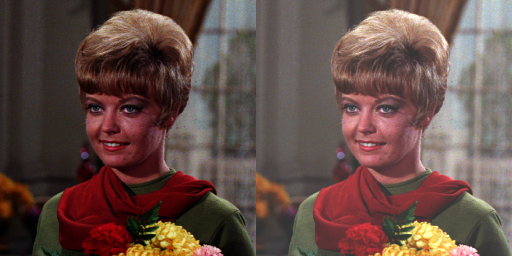

In [ ]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
    brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Colab Notebooks Images/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# Cara simpel tanpa for loop
# Brightness_image = cv.convert.ScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


TUGAS PRAKTIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

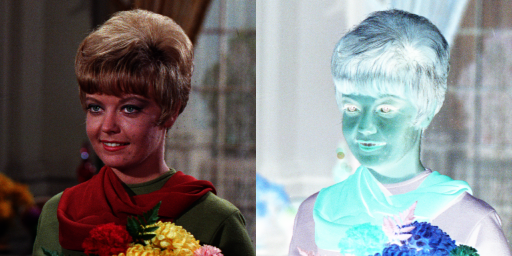

In [ ]:
original = cv.imread('/content/drive/MyDrive/Colab Notebooks Images/Images/female.tiff')
final_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      final_image[y, x, c] = 255 - (original[y, x, c])

#cara simple tanpa for loop
#final_frame = cv.converScaleAbs(original, contrast, brightness)

final_frame = cv.hconcat((original, final_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


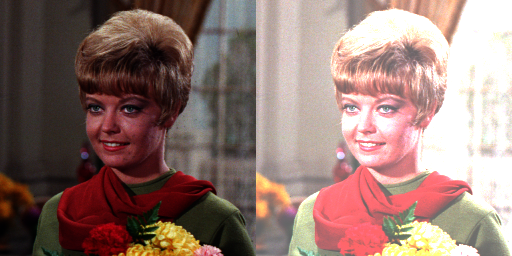

In [ ]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Colab Notebooks Images/Images/female.tiff')
final_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      final_image[y, x, c] = np.clip(contrast * (original[y, x, c] + brightness), 0, 255)

#cara simple tanpa for loop
#final_frame = cv.converScaleAbs(original, contrast, brightness)

final_frame = cv.hconcat((original, final_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------
Masukkan tingkat kecerahan: 50


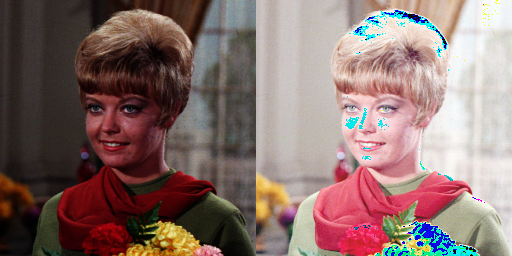

In [ ]:

print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------')
try:
  r_value = int(input('Masukkan tingkat kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Colab Notebooks Images/Images/female.tiff')
log_image = np.zeros(original.shape, original.dtype)

#cara simple tanpa for loop
c = r_value
log_image = c * (np.log(original + 1))

log_image = np.array(log_image, dtype = np.uint8)

final_frame = cv.hconcat((original, log_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut: 

In [ ]:
original = cv.imread('/content/drive/MyDrive/Colab Notebooks Images/Images/mandrill.tiff')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
lightness_img = np.zeros(original.shape, original.dtype)

a. Averaging

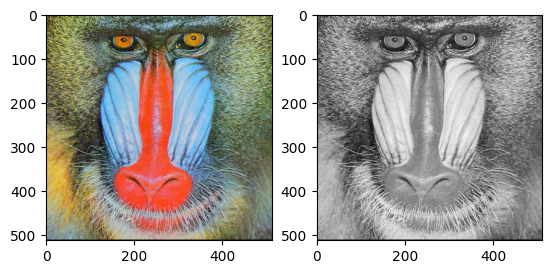

In [ ]:
def conv_averaging(img_ori):
  grayValue = (img_ori[:,:,0] / 3) + (img_ori[:,:,1] / 3) + (img_ori[:,:,2] / 3)
  averaging_img = grayValue.astype(np.uint8)
  return averaging_img
averaging = conv_averaging(original)
fix, ax = plt.subplots(1, 2)
ax[0].imshow(original)
ax[1].imshow(averaging, cmap='gray')

b. Lightness

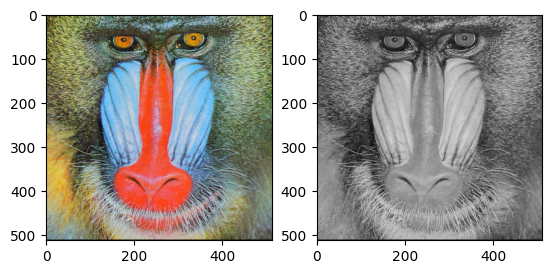

In [ ]:
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    lightness_img[y,x,:] = int((max(original[y,x,:]) / 2) + (min(original[y,x,:]) / 2))
fix, ax = plt.subplots(1, 2)
ax[0].imshow(original)
ax[1].imshow(lightness_img, cmap='gray')

c. Luminance

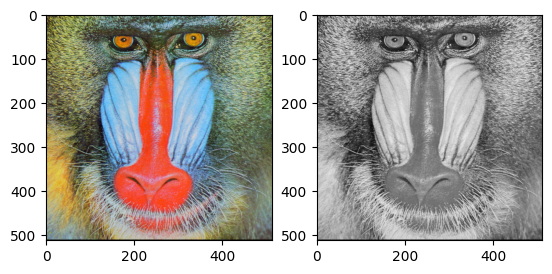

In [ ]:
def conv_luminance(img_ori):
  grayValue = (0.2126 * img_ori[:,:,0]) + (0.7152 * img_ori[:,:,1]) + (0.0722 * img_ori[:,:,2])
  luminance_img = grayValue.astype(np.uint8)
  return luminance_img
luminance = conv_luminance(original)
fix, ax = plt.subplots(1, 2)
ax[0].imshow(original)
ax[1].imshow(luminance, cmap='gray')

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

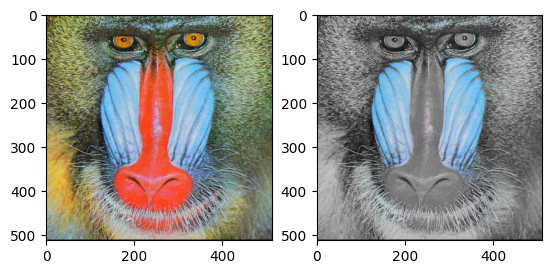

In [57]:
img_4 = cv.imread('/content/drive/MyDrive/Colab Notebooks Images/Images/mandrill.tiff')
img_rgb = cv.cvtColor(img_4,cv.COLOR_BGR2RGB)
ret, mask = cv.threshold(img_4[:,:,0], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_4)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

blue = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_4, 255 - mask3)

out = gray + blue

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')
